WBCD Dataset Neural Network 

### Import Libraries

In [8]:
import numpy as np
import pandas as pd
import time 

import matplotlib.pyplot as plt

# from sklearn.cross_validation import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from textwrap import wrap

### Import more Libraries


In [9]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

### Load Dataset

In [3]:
RANDOM_SEED = 25

df = pd.read_csv('../datasets/us_income/adult-train.csv', delimiter=',', quotechar='"')


### Dataframe without Preprocessing 

In [4]:
print("Printing dataframe head (without any preprocessing)....")
print(df.head(10))

Printing dataframe head (without any preprocessing)....
   Age     Workclass  Fnlwgt      Education  EducationNum  \
0   34   Federal-gov   67083      Bachelors            13   
1   72   Federal-gov   39110           11th             7   
2   45   Federal-gov  235891     Assoc-acdm            12   
3   26   Federal-gov  206983    Prof-school            15   
4   31   Federal-gov  139455      Bachelors            13   
5   27   Federal-gov  196386     Assoc-acdm            12   
6   19   Federal-gov  255921   Some-college            10   
7   60   Federal-gov   27466   Some-college            10   
8   59   Federal-gov  212448        HS-grad             9   
9   32   Federal-gov  148138      Bachelors            13   

         MaritalStatus          Occupation    Relationship  \
0        Never-married     Exec-managerial       Unmarried   
1             Divorced        Adm-clerical   Not-in-family   
2        Never-married        Adm-clerical   Not-in-family   
3   Married-civ-spouse  

### Dataset Preprocessing 

In [5]:
df.replace(' <=50K', 0, inplace=True)
df.replace(' >50K', 1, inplace=True)

df = pd.get_dummies(df)
# print(df.head(5))

X = df.loc[:, df.columns != 'Income']
y = df['Income']

### Sanity Check on Dataframe 

In [6]:
print("Sanity Check: Printing out dataframe and shape after preprocessing... ")
print(df.head(10))
print("df.shape: ", df.shape)


Sanity Check: Printing out dataframe and shape after preprocessing... 
   Age  Fnlwgt  EducationNum  CapitalGain  CapitalLoss  HoursPerWeek  Income  \
0   34   67083            13         1471            0            40       0   
1   72   39110             7            0            0             8       0   
2   45  235891            12            0            0            40       0   
3   26  206983            15            0            0            60       0   
4   31  139455            13            0            0            40       0   
5   27  196386            12         4064            0            40       0   
6   19  255921            10            0            0            20       0   
7   60   27466            10            0            0            40       0   
8   59  212448             9            0            0            40       0   
9   32  148138            13            0         2002            40       0   

   Workclass_ Federal-gov  Workclass_ Local-gov 

### Run kMeans Experiments, varying k

running kMeans for k = 1  .........
running kMeans for k = 2  .........
running kMeans for k = 3  .........
running kMeans for k = 4  .........
running kMeans for k = 5  .........
running kMeans for k = 6  .........
running kMeans for k = 7  .........
running kMeans for k = 8  .........
running kMeans for k = 9  .........
running kMeans for k = 10  .........
running kMeans for k = 11  .........
running kMeans for k = 12  .........
running kMeans for k = 13  .........
running kMeans for k = 14  .........
running kMeans for k = 15  .........
running kMeans for k = 16  .........
running kMeans for k = 17  .........
running kMeans for k = 18  .........
running kMeans for k = 19  .........
running kMeans for k = 20  .........
running kMeans for k = 21  .........
running kMeans for k = 22  .........
running kMeans for k = 23  .........
running kMeans for k = 24  .........
running kMeans for k = 25  .........
running kMeans for k = 26  .........
running kMeans for k = 27  .........
running kM

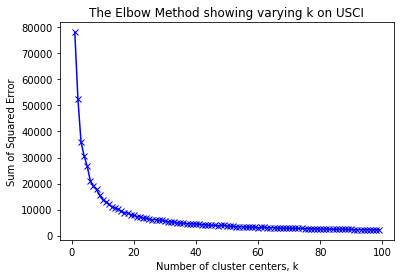

In [12]:
# Hyperparameters 

# Vary this as needed 
init_method = "k-means++"
# Number of times to run algo with different centroid seeds 
n_init = 1
max_iter = 10 
# Runs each of the n_inits in parallel using specified number of threads
n_jobs = 1



# k means determine k
distortions = []
K = range(1,101)

for k in K:
    print("running kMeans for k =", k, " .........")
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    
    clf_kMeans = KMeans(n_clusters=k, random_state=0)
    clf_kMeans.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

    
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing varying k on USCI')
plt.xlabel('Number of cluster centers, k')
plt.ylabel('Sum of Squared Error')
plt.show()



# error = mean_squared_error(y, clf_kMeans.predict(X))
# # test_err = mean_squared_error(y_test,
# #                                     clf.predict(X_test))

# print("Error: ", error)
# print("Cluster centers: ", clf_kMeans.cluster_centers_)


# # Plot results
# print 'plotting results'
# plt.figure()
# title = 'Census Income kNN: Performance'
# plt.title('\n'.join(wrap(title,60)))
# plt.plot(ks, test_err, '-', label='test error')
# plt.plot(ks, train_err, '-', label='train error')
# plt.legend()
# plt.xlabel('Num Estimators')
# plt.ylabel('Mean Square Error')
# plt.savefig('plots/CensusIncome/kNN/zeroes_and_one/censusIncome_kNN.png')
# print 'plot complete'
# ### ---

### Run kMeans Experiments (Vary init_method, keep k constant) 

Running kMeans for max_iter = 100  and init_method: k-means++
Running kMeans for max_iter = 120  and init_method: k-means++
Running kMeans for max_iter = 140  and init_method: k-means++
Running kMeans for max_iter = 160  and init_method: k-means++
Running kMeans for max_iter = 180  and init_method: k-means++
Running kMeans for max_iter = 200  and init_method: k-means++
Running kMeans for max_iter = 220  and init_method: k-means++
Running kMeans for max_iter = 240  and init_method: k-means++
Running kMeans for max_iter = 260  and init_method: k-means++
Running kMeans for max_iter = 280  and init_method: k-means++
Running kMeans for max_iter = 300  and init_method: k-means++
Running kMeans for max_iter = 320  and init_method: k-means++
Running kMeans for max_iter = 340  and init_method: k-means++
Running kMeans for max_iter = 360  and init_method: k-means++
Running kMeans for max_iter = 380  and init_method: k-means++
Running kMeans for max_iter = 400  and init_method: k-means++
Running 

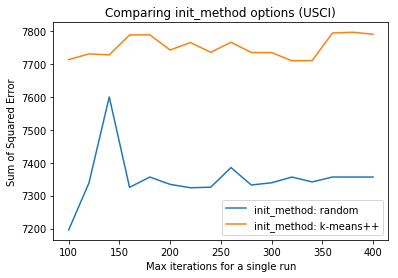

In [15]:
# Hyperparameters 

init_methods = ["k-means++", "random"]
# Number of times to run algo with different centroid seeds 
n_init = 1
max_iter = 10 
# Runs each of the n_inits in parallel using specified number of threads
n_jobs = 1


distortions_random = []
distortions_kplus = []

# Fix k 
k = 20

# Select range of max_iterations
max_iterations = range(100, 420, 20)


for init_method in init_methods: 
    for max_iter in max_iterations: 
        print("Running kMeans for max_iter =", max_iter, " and init_method:", init_method)
        kmeanModel = KMeans(n_clusters=k, init = init_method, max_iter=max_iter).fit(X)
        kmeanModel.fit(X)

    #     clf_kMeans = KMeans(n_clusters=k, random_state=0)
        clf_kMeans = KMeans(n_clusters=k)
        clf_kMeans.fit(X)
        distortion = sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0]

        if init_method == "random": 
            distortions_random.append(distortion)

        elif init_method == "k-means++": 
            distortions_kplus.append(distortion)


    
# Plot the elbow

plt.plot(max_iterations, distortions_random, '-', label='init_method: random')
plt.plot(max_iterations, distortions_kplus, '-', label='init_method: k-means++')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Comparing init_method options (USCI)')
plt.xlabel('Max iterations for a single run')
plt.ylabel('Sum of Squared Error')
plt.legend()
plt.show()


# # Plot results
# print 'plotting results'
# plt.figure()
# title = 'Census Income kNN: Performance'
# plt.title('\n'.join(wrap(title,60)))
# plt.plot(ks, test_err, '-', label='test error')
# plt.plot(ks, train_err, '-', label='train error')
# plt.legend()
# plt.xlabel('Num Estimators')
# plt.ylabel('Mean Square Error')
# plt.savefig('plots/CensusIncome/kNN/zeroes_and_one/censusIncome_kNN.png')
# print 'plot complete'
# ### ---

### Run Expectation Maximization Experiments 

Running EM for k = 1  and cov: full        time taken so far:  0.0004119873046875
Running EM for k = 2  and cov: full        time taken so far:  0.2659034729003906
Running EM for k = 3  and cov: full        time taken so far:  1.705829381942749
Running EM for k = 4  and cov: full        time taken so far:  4.1055333614349365
Running EM for k = 5  and cov: full        time taken so far:  8.3880295753479
Running EM for k = 6  and cov: full        time taken so far:  14.069188833236694
Running EM for k = 7  and cov: full        time taken so far:  19.344780683517456
Running EM for k = 8  and cov: full        time taken so far:  25.770928621292114
Running EM for k = 9  and cov: full        time taken so far:  32.40484309196472
Running EM for k = 10  and cov: full        time taken so far:  40.172607421875
Running EM for k = 11  and cov: full        time taken so far:  50.0319459438324
Running EM for k = 12  and cov: full        time taken so far:  64.35852003097534
Running EM for k = 13  a

Running EM for k = 2  and cov: tied        time taken so far:  10018.981253147125
Running EM for k = 3  and cov: tied        time taken so far:  10020.984849452972
Running EM for k = 4  and cov: tied        time taken so far:  10023.47936463356
Running EM for k = 5  and cov: tied        time taken so far:  10028.43415760994
Running EM for k = 6  and cov: tied        time taken so far:  10032.12421798706
Running EM for k = 7  and cov: tied        time taken so far:  10038.358719348907
Running EM for k = 8  and cov: tied        time taken so far:  10045.466478347778
Running EM for k = 9  and cov: tied        time taken so far:  10055.037389993668
Running EM for k = 10  and cov: tied        time taken so far:  10065.4113676548
Running EM for k = 11  and cov: tied        time taken so far:  10080.11691737175
Running EM for k = 12  and cov: tied        time taken so far:  10093.711530447006
Running EM for k = 13  and cov: tied        time taken so far:  10105.285484790802
Running EM for k =

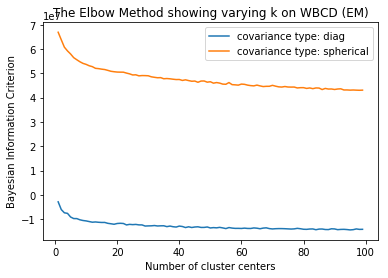

In [26]:
# Hyperparameters 

init_method = "k-means++"
# Number of times to run algo with different centroid seeds 
n_init = 1
max_iter = 10 
# Runs each of the n_inits in parallel using specified number of threads
n_jobs = 1

covariance_types = ['full','tied','diag','spherical']


# Hyperparameters 

# Vary this as needed 
init_method = "k-means++"
# Number of times to run algo with different centroid seeds 
n_init = 1
max_iter = 10 
# Runs each of the n_inits in parallel using specified number of threads
n_jobs = 1


distortions_full = []
distortions_tied = []
# distortions_diag = []
# distortions_spherical = []


# covariance_types = ['full','tied','diag','spherical']
covariance_types = ['full','tied']

K = range(1,100)

start_time = time.time()

for cov in covariance_types: 
    for k in K:
        print("Running EM for k =", k, " and cov:", cov, "       time taken so far: ", time.time() - start_time)
        
        kmeanModel = GaussianMixture(n_components=k,covariance_type=cov, reg_covar=0.0001)
        kmeanModel.fit(X)

        if cov == 'full': 
            distortions_full.append(kmeanModel.bic(X))
        elif cov == 'tied': 
            distortions_tied.append(kmeanModel.bic(X))
        elif cov == 'diag': 
            distortions_diag.append(kmeanModel.bic(X))
        elif cov == 'spherical': 
            distortions_spherical.append(kmeanModel.bic(X))
            
        
end_time = time.time()

print("\n\n Time taken to run first 2: ", end_time - start_time)

# plt.plot(K, distortions_full, '-', label='covariance type: full')
# plt.plot(K, distortions_tied, '-', label='covariance type: tied')
plt.plot(K, distortions_diag, '-', label='covariance type: diag')
plt.plot(K, distortions_spherical, '-', label='covariance type: spherical')
plt.title('The Elbow Method showing varying k on WBCD (EM)')
plt.xlabel('Number of cluster centers')
plt.ylabel('Bayesian Information Criterion')
plt.legend()
plt.show()



In [27]:
print("\n\n Time taken to run last 2: ", end_time - start_time)



 Time taken to run last 2:  16178.008618354797


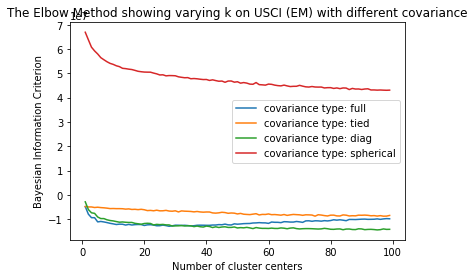

In [28]:
plt.plot(K, distortions_full, '-', label='covariance type: full')
plt.plot(K, distortions_tied, '-', label='covariance type: tied')
plt.plot(K, distortions_diag, '-', label='covariance type: diag')
plt.plot(K, distortions_spherical, '-', label='covariance type: spherical')
plt.title('The Elbow Method showing varying k on USCI (EM) with different covariance')
plt.xlabel('Number of cluster centers')
plt.ylabel('Bayesian Information Criterion')
plt.legend()
plt.savefig('USCI_EM_Elbow.png')
plt.show()